In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [3]:
# Get all the tickers of S&P 100 from Wikipedia

url = 'https://en.wikipedia.org/wiki/S%26P_100'
response = requests.get(url)

if response.status_code == 200:
    parsed_data = BeautifulSoup(response.content, 'html.parser')
    
    table = parsed_data.find('table', {'id': 'constituents'})
    
    if table:
        snp100 = [row.find_all('td')[0].get_text(strip=True) for row in table.find_all('tr') if row.find_all('td')]
    else:
        print("Table not found.")
else:
    print(f"Failed to fetch. Status code: {response.status_code}")

snp100

['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK.B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [4]:
# Correcting ticker name for Berkshire Hathaway

i = snp100.index('BRK.B')
snp100[i] = 'BRK-B'
snp100

['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK-B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [5]:
# Function for preprocessing data of a single ticker to desired format of Zipline

def preprocess(data):
    data.reset_index(inplace=True)
    data.drop(columns=['Adj Close'], inplace=True)
    data.rename(columns={'Date': 'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume', }, inplace=True)
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['volume'] = data['volume'].astype('float64')
    data.sort_values(by='timestamp', inplace=True)
    data.reset_index(drop=True, inplace=True)

    return data

In [6]:
# Fetching historical data for each ticker in S&P100

start_date = '2010-01-01'
end_date = '2021-07-31'

snp100_data_dict = {}

for ticker in snp100:
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
    preprocess(data).to_csv(f'/home/sharar/Documents/SNP100/daily/{ticker}.csv', index=False)
    snp100_data_dict[ticker] = data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## Register and Ingest S&P100 Bundle

In [7]:
from zipline.data import bundles

bundle_name = 'snp100'

bundles.register(
    bundle_name,
    bundles.csvdir.csvdir_equities(
        ['daily'],
        '/home/sharar/Documents/SNP100'
    ),
    calendar_name='NYSE',

)
 
bundles.bundles

mappingproxy({'quandl': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function quandl_bundle at 0x7f023ee8d760>, create_writers=True),
              'quantopian-quandl': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function quantopian_quandl_bundle at 0x7f023ee8d800>, create_writers=False),
              'csvdir': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function csvdir_bundle at 0x7f023ee8d9e0>, create_writers=True),
              'snp100': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x7f023ec3b490>>, create_writers=True)})

In [8]:
bundles.ingest(bundle_name)

In [9]:
bundle_data = bundles.load(bundle_name)
sids = bundle_data.asset_finder.sids
assets = bundle_data.asset_finder.retrieve_all(sids)

print(assets)

[Equity(0 [AAPL]), Equity(1 [ABBV]), Equity(2 [ABT]), Equity(3 [ACN]), Equity(4 [ADBE]), Equity(5 [AIG]), Equity(6 [AMD]), Equity(7 [AMGN]), Equity(8 [AMT]), Equity(9 [AMZN]), Equity(10 [AVGO]), Equity(11 [AXP]), Equity(12 [BA]), Equity(13 [BAC]), Equity(14 [BK]), Equity(15 [BKNG]), Equity(16 [BLK]), Equity(17 [BMY]), Equity(18 [BRK-B]), Equity(19 [C]), Equity(20 [CAT]), Equity(21 [CHTR]), Equity(22 [CL]), Equity(23 [CMCSA]), Equity(24 [COF]), Equity(25 [COP]), Equity(26 [COST]), Equity(27 [CRM]), Equity(28 [CSCO]), Equity(29 [CVS]), Equity(30 [CVX]), Equity(31 [DE]), Equity(32 [DHR]), Equity(33 [DIS]), Equity(34 [DOW]), Equity(35 [DUK]), Equity(36 [EMR]), Equity(37 [EXC]), Equity(38 [F]), Equity(39 [FDX]), Equity(40 [GD]), Equity(41 [GE]), Equity(42 [GILD]), Equity(43 [GM]), Equity(44 [GOOG]), Equity(45 [GOOGL]), Equity(46 [GS]), Equity(47 [HD]), Equity(48 [HON]), Equity(49 [IBM]), Equity(50 [INTC]), Equity(51 [JNJ]), Equity(52 [JPM]), Equity(53 [KHC]), Equity(54 [KO]), Equity(55 [LIN

In [10]:
!zipline bundles

csvdir <no ingestions>
quandl 2023-12-11 07:37:18.949895
quandl 2023-12-11 07:24:36.984727
quandl 2023-12-11 07:24:06.199682
quandl 2023-12-11 07:07:08.337964
quandl 2023-12-11 07:00:35.935335
quandl 2023-12-11 06:31:16.394693
quandl 2023-12-11 06:26:05.247892
quandl 2023-12-11 06:25:12.688731
quantopian-quandl <no ingestions>
snp100 2023-12-14 06:17:41.776122
snp100 2023-12-13 16:28:34.337289
snp100 2023-12-13 16:27:01.629739
snp100 2023-12-13 16:24:44.412941
snp100 2023-12-13 16:23:17.224028
snp100 2023-12-13 16:22:32.401687


In [11]:
!zipline ingest -b snp100

[2023-12-14T12:17:56+0600-INFO][zipline.data.bundles.core]
 Ingesting snp100
Loading custom pricing data:   [####################################]  100%          
Merging daily equity files:  [####################################]     
[2023-12-14T12:18:02+0600-INFO][root]
 copying /tmp/tmpt7a0rxw4/snp100/2023-12-14T06;17;55.773368/adjustments.sqlite -> /home/sharar/.zipline/data/snp100/2023-12-14T06;17;55.773368
[2023-12-14T12:18:02+0600-INFO][root]
 creating /home/sharar/.zipline/data/snp100/2023-12-14T06;17;55.773368/daily_equities.bcolz
[2023-12-14T12:18:02+0600-INFO][root]
 creating /home/sharar/.zipline/data/snp100/2023-12-14T06;17;55.773368/daily_equities.bcolz/low
[2023-12-14T12:18:02+0600-INFO][root]
 copying /tmp/tmpt7a0rxw4/snp100/2023-12-14T06;17;55.773368/daily_equities.bcolz/low/__attrs__ -> /home/sharar/.zipline/data/snp100/2023-12-14T06;17;55.773368/daily_equities.bcolz/low
[2023-12-14T12:18:02+0600-INFO][root]
 creating /home/sharar/.zipline/data/snp100/2023-12-14T06;1

In [12]:
!zipline bundles

csvdir <no ingestions>
quandl 2023-12-11 07:37:18.949895
quandl 2023-12-11 07:24:36.984727
quandl 2023-12-11 07:24:06.199682
quandl 2023-12-11 07:07:08.337964
quandl 2023-12-11 07:00:35.935335
quandl 2023-12-11 06:31:16.394693
quandl 2023-12-11 06:26:05.247892
quandl 2023-12-11 06:25:12.688731
quantopian-quandl <no ingestions>
snp100 2023-12-14 06:17:55.773368
snp100 2023-12-14 06:17:41.776122
snp100 2023-12-13 16:28:34.337289
snp100 2023-12-13 16:27:01.629739
snp100 2023-12-13 16:24:44.412941
snp100 2023-12-13 16:23:17.224028
snp100 2023-12-13 16:22:32.401687


## Backtest with Keltner

In [6]:
from strategy.keltner import keltner
from zipline.api import (order, order_target, record, symbol, get_datetime,
                         order_target_percent,
                         order_target_value,
                         set_benchmark,
                         get_open_orders)
from zipline import run_algorithm

ModuleNotFoundError: No module named 'strategy'

In [14]:
def asset_df(symbol):
    df = pd.read_csv('/home/sharar/Documents/SNP100/daily/' + str(symbol) + '.csv')
    return df.set_index(pd.DatetimeIndex(df.timestamp))

In [1]:
%%capture kltr

capital_base = 10000
symb = 'TSLA'
window = 90

def initialize(context):
    context.i = 0
    # set_benchmark(symbol(symb))

    assets = list()
    for ticker in snp100:
        assets.append(symbol(ticker))

    context.assets = assets
    
    context.signals = {}
    for asset in context.assets:
        df = asset_df(asset.symbol)
        signals, mid, upper, lower = keltner(df, span=window, strategy=1, TimeperiodLong =40, TimeperiodShort =4, AdaWin =4)
        context.signals[asset.symbol] = signals 
    context.i = 0
    
def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < window+1:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    # cash = min(context.portfolio.cash, 20000)
    current_date = data.history(context.assets[0], 'price', bar_count=2, frequency="1d").index[-1]
    for asset in context.assets:
        if data.can_trade(asset) and not get_open_orders(asset):
            cash = context.portfolio.cash
            price = data.current(asset, "price")
            # Find corresponding signal
            open_orders = get_open_orders()
            if context.signals[asset.symbol][current_date]==1:
                # 1 signal means upward trend
                order_target(asset, cash//price)
            elif context.signals[asset.symbol][current_date]==-1:
                # Assume downward trend and sell off
                order_target(asset, 0)
            else:
                pass
    

result = run_algorithm(start=pd.to_datetime(start_date),
                        end=pd.to_datetime(end_date),
                        initialize=initialize,
                        handle_data=handle_data,
                        capital_base=capital_base,
                        bundle='snp100',
                        data_frequency='daily',
                        )

NameError: name 'run_algorithm' is not defined

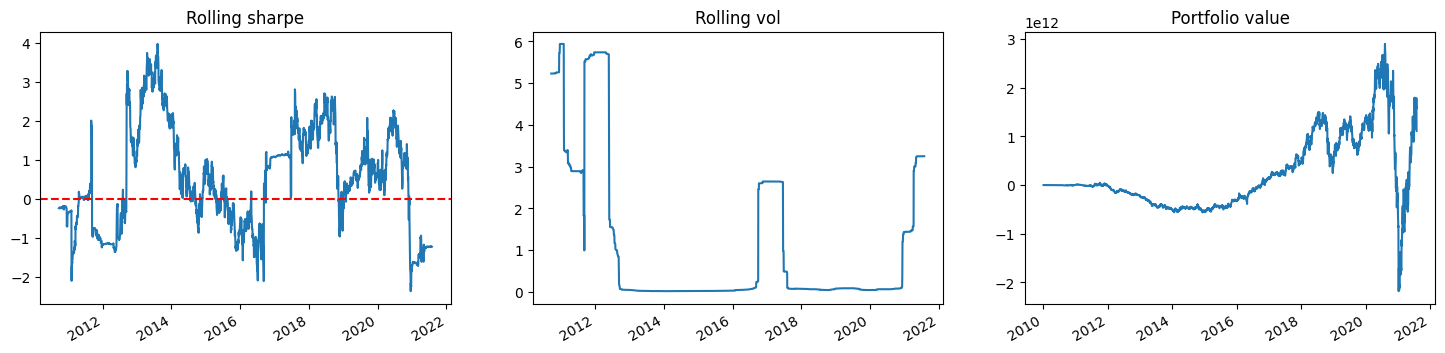

In [16]:
%matplotlib inline

import modules.stats_main as stat
result = stat.show_rolling_stats(result, 180)

## Stop Loss

In [17]:
def analyze(perf):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 18])

    # portfolio value
    perf.portfolio_value.plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in $')

    # asset
    perf.price.plot(ax=ax[1])
    ax[1].set_ylabel('price in $')

    # mark transactions
    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax[1].plot(buys.index, perf.price.loc[buys.index], '^', markersize=4, color='g', label='buy')
    ax[1].plot(sells.index, perf.price.loc[sells.index], 'v', markersize=4, color='r', label='sell')
    print(f'Buycount:{len(buys.index)}, Sellcount:{len(sells.index)}')
    
    # value on price
    (1+perf.portfolio_value.pct_change()).cumprod().plot(ax=ax[2])
    (1+perf.price.pct_change()).cumprod().plot(ax=ax[2])
    ax[2].set_ylabel('Performance')

    fig.suptitle('Results', fontsize=16)
    plt.legend()
    plt.savefig(('buy_and_hold'), dpi=300)
    plt.show()

AttributeError: 'DataFrame' object has no attribute 'price'

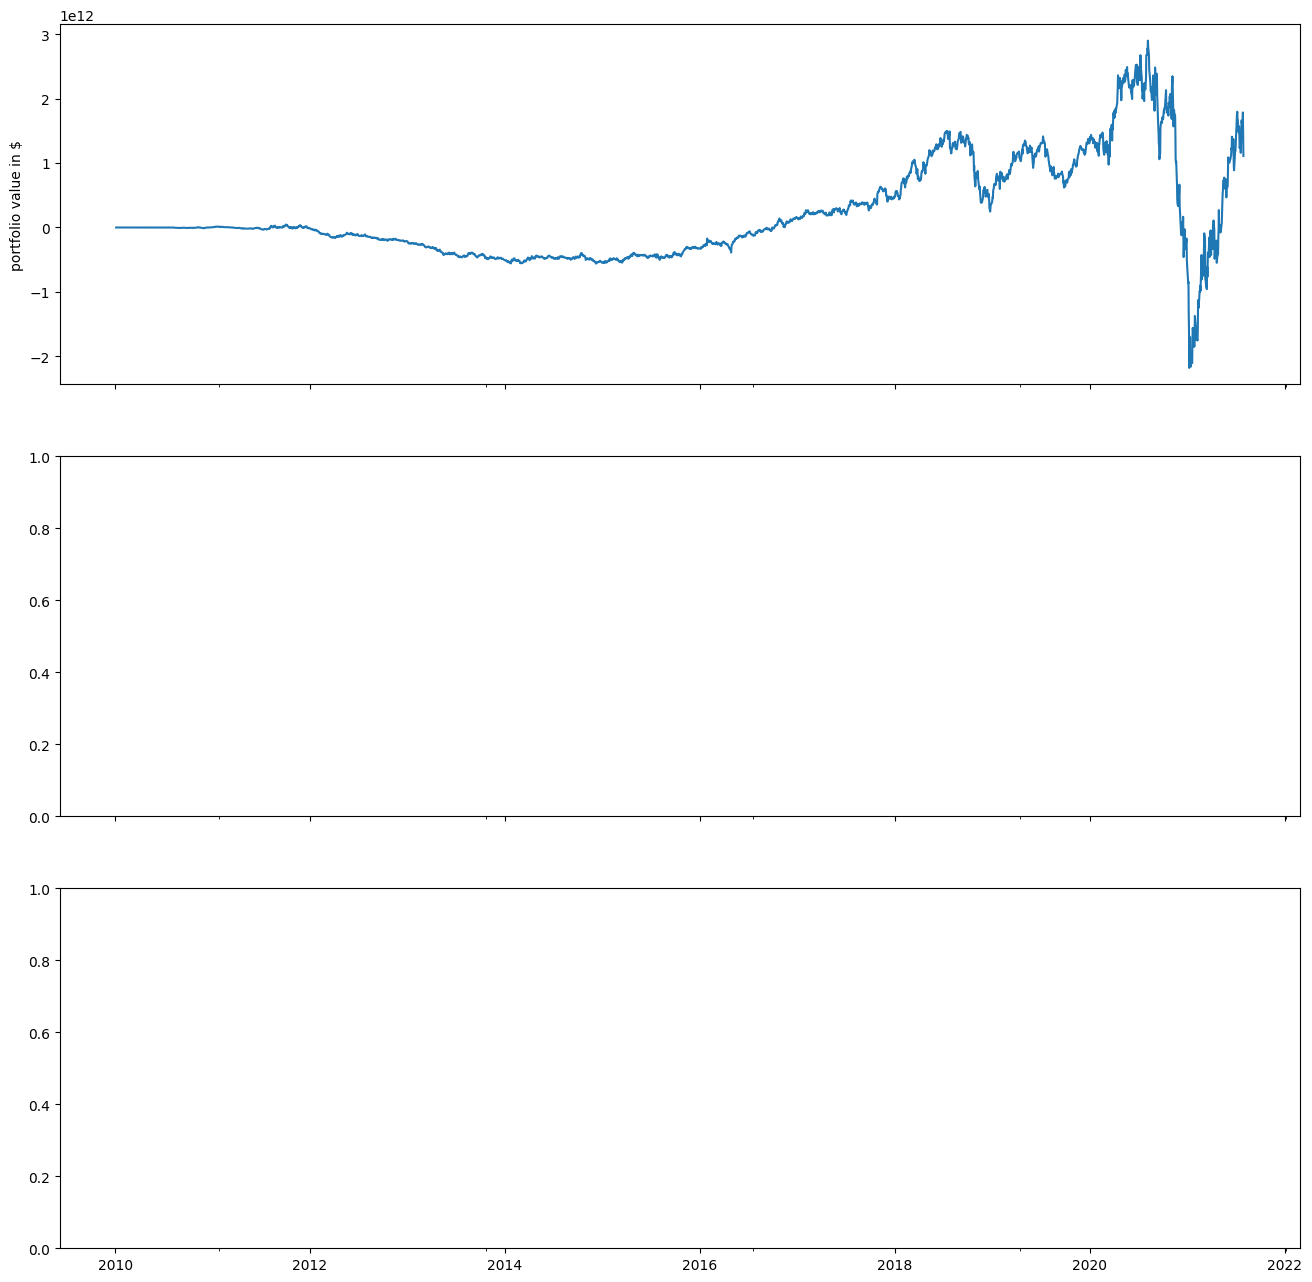

In [18]:
analyze(result)

## Optimizing Sharpe

In [20]:
%%capture kltr

capital_base = 10000
symb = 'TSLA'
window = 60

def initialize(context):
    context.i = 0
    # set_benchmark(symbol(symb))

    assets = list()
    for ticker in snp100:
        assets.append(symbol(ticker))

    context.assets = assets
    
    context.signals = {}
    for asset in context.assets:
        df = asset_df(asset.symbol)
        signals, mid, upper, lower = keltner(df, span=window, strategy=1, TimeperiodLong =window, TimeperiodShort =10, AdaWin =10)
        context.signals[asset.symbol] = signals 
    context.i = 0
    
def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < window+1:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    # cash = min(context.portfolio.cash, 20000)
    current_date = data.history(context.assets[0], 'price', bar_count=2, frequency="1d").index[-1]
    for asset in context.assets:
        if data.can_trade(asset) and not get_open_orders(asset):
            cash = context.portfolio.cash
            price = data.current(asset, "price")
            # Find corresponding signal
            open_orders = get_open_orders()
            if context.signals[asset.symbol][current_date]==1:
                # 1 signal means upward trend
                order_target(asset, cash//price)
            elif context.signals[asset.symbol][current_date]==-1:
                # Assume downward trend and sell off
                order_target(asset, 0)
            else:
                pass
    

result = run_algorithm(start=pd.to_datetime(start_date),
                        end=pd.to_datetime(end_date),
                        initialize=initialize,
                        handle_data=handle_data,
                        capital_base=capital_base,
                        bundle='snp100',
                        data_frequency='daily',
                        )

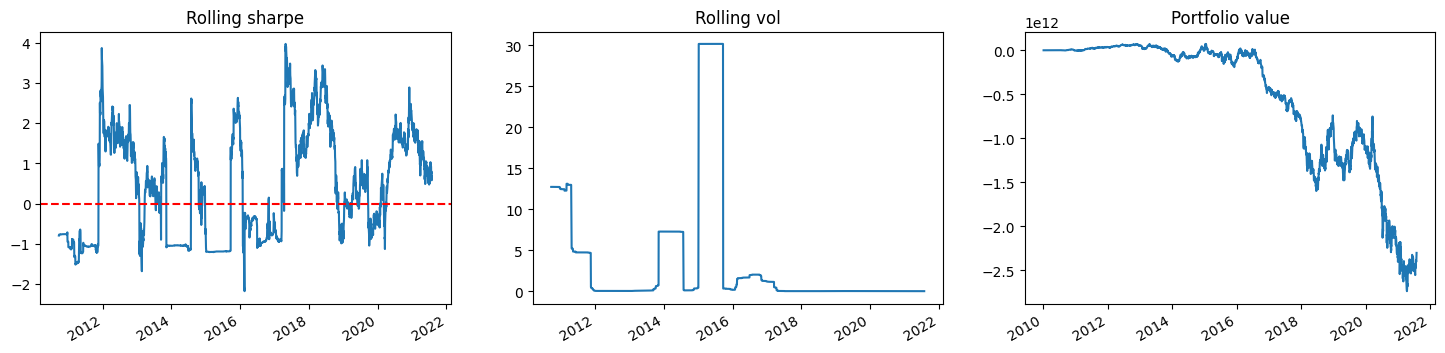

In [21]:
%matplotlib inline

import modules.stats_main as stat
result = stat.show_rolling_stats(result, 180)

In [22]:
!pip install pyfolio-reloaded

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:01:01


/home/sharar/anaconda3/lib/python3.11/site-packages/empyrical/stats.py:391: RuntimeWarning: invalid value encountered in scalar power
  return ending_value ** (1 / num_years) - 1
/home/sharar/anaconda3/lib/python3.11/site-packages/empyrical/stats.py:391: RuntimeWarning: invalid value encountered in scalar power
  return ending_value ** (1 / num_years) - 1
/home/sharar/anaconda3/lib/python3.11/site-packages/empyrical/stats.py:1380: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()
/home/sharar/anaconda3/lib/python3.11/site-packages/pyfolio/plotting.py:666: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2010-01-04
End date,2021-07-30
Total months,138
,Backtest
Annual return,nan%
Cumulative returns,-23009737012.627%
Annual volatility,13395.398%
Sharpe ratio,-0.43
Calmar ratio,NaN
Stability,NaN
Max drawdown,-2894324.221%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,2894324.22,2010-03-31,2010-04-29,2010-04-30,23
1,3873.90,2015-01-12,2021-04-12,NaT,NaN
2,352.45,2010-05-12,2010-06-18,2010-07-16,48
3,344.17,2010-07-23,2010-09-09,2010-09-22,44
4,279.69,2013-04-18,2014-03-10,2015-01-12,453


Stress Events,mean,min,max
US downgrade/European Debt Crisis,2.01%,-11.12%,13.92%
Fukushima,15.41%,-240.14%,262.00%
EZB IR Event,0.53%,-8.95%,5.26%
Flash Crash,139.47%,-61.02%,648.55%
Apr14,-1.25%,-37.86%,31.05%
Oct14,-0.25%,-52.75%,86.76%
Fall2015,-0.04%,-27.91%,77.35%
Recovery,-21.98%,-15971.82%,2763.23%
New Normal,-35.21%,-40496.47%,1680.67%
Covid,0.22%,-17.87%,19.89%


Top 10 long positions of all time,max
sid,
GE,594369.27%
WFC,538789.14%
MSFT,504274.82%
C,480207.21%
JNJ,475387.54%
CVX,465142.54%
MS,381190.36%
MRK,355279.67%
GILD,354630.17%


Top 10 short positions of all time,max
sid,
INTC,-807730.13%
JPM,-793873.66%
CSCO,-762303.66%
GS,-721420.67%
IBM,-658457.38%
F,-492596.13%
PG,-490384.00%
T,-454652.19%
KO,-426680.07%


Top 10 positions of all time,max
sid,
INTC,807730.13%
JPM,793873.66%
CSCO,762303.66%
GS,721420.67%
IBM,658457.38%
GE,594369.27%
WFC,538789.14%
MSFT,504274.82%
F,492596.13%


/home/sharar/anaconda3/lib/python3.11/site-packages/pyfolio/pos.py:100: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  longs = expos.where(expos.applymap(lambda x: x > 0))
/home/sharar/anaconda3/lib/python3.11/site-packages/pyfolio/pos.py:101: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  shorts = expos.where(expos.applymap(lambda x: x < 0))
/home/sharar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


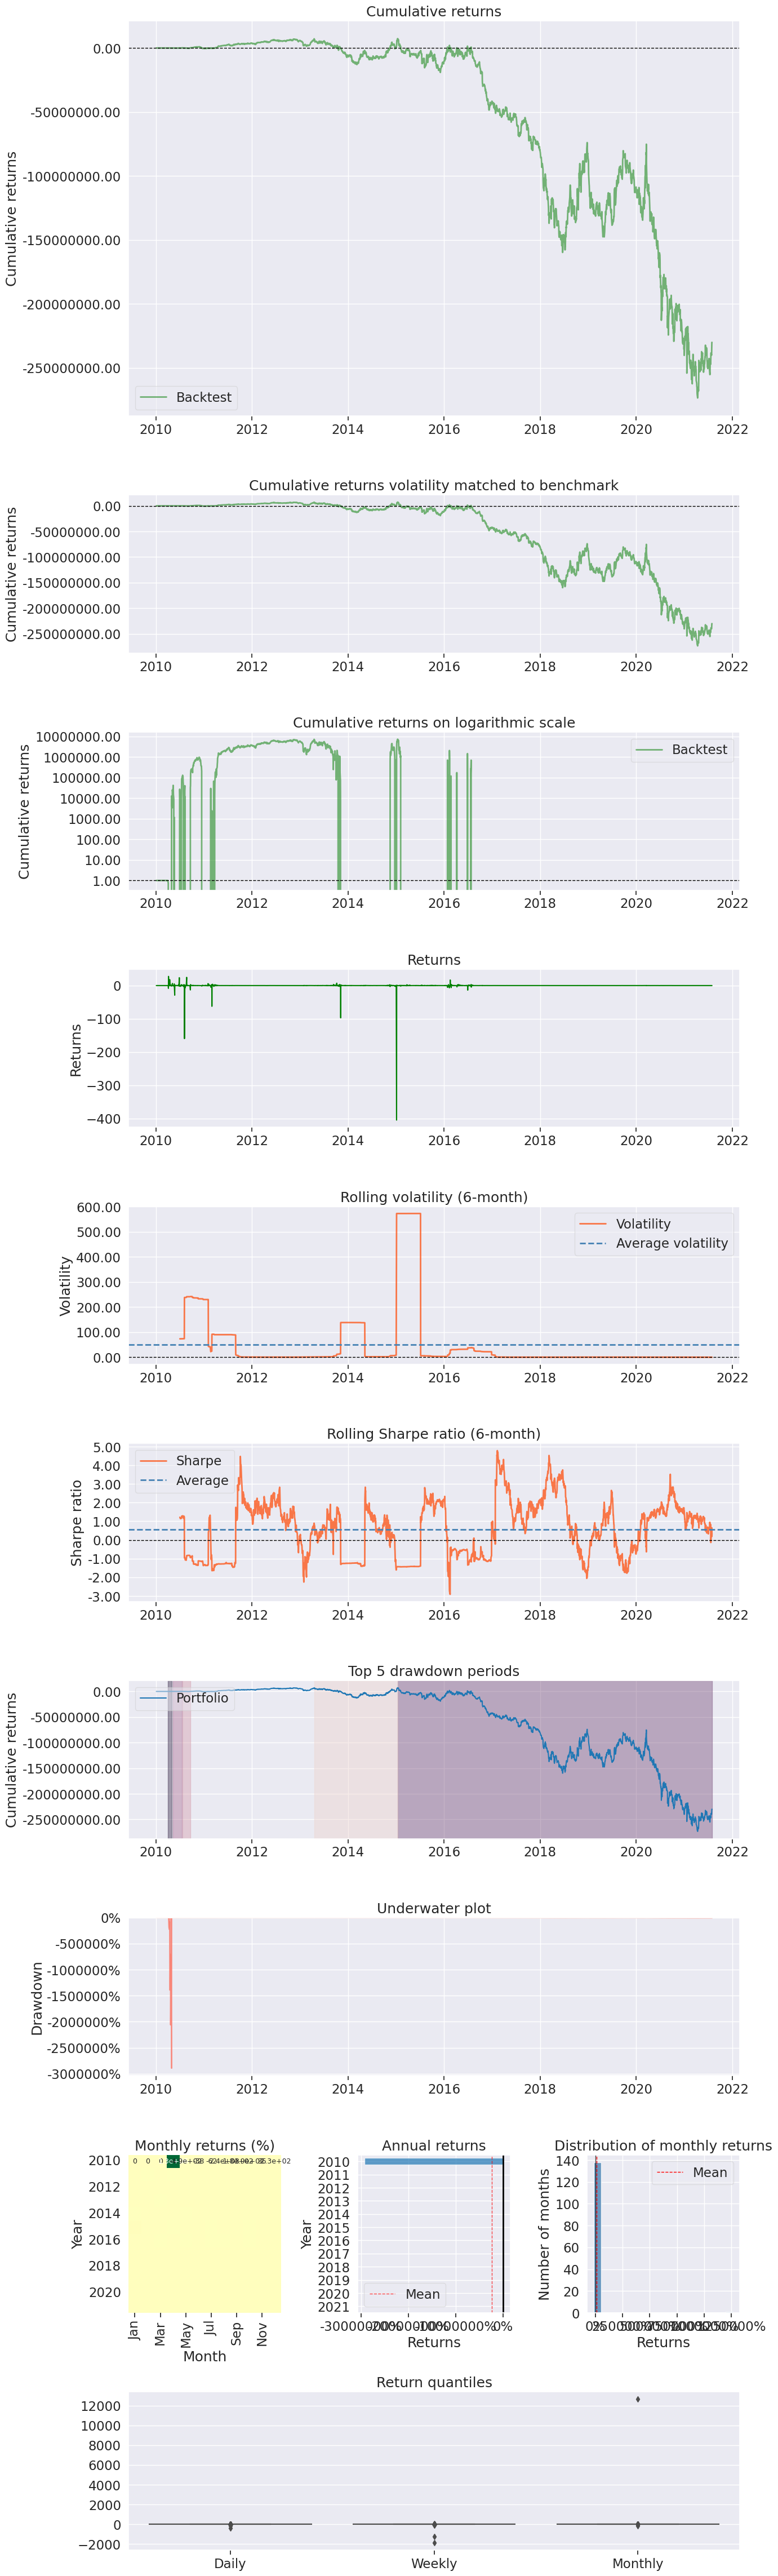

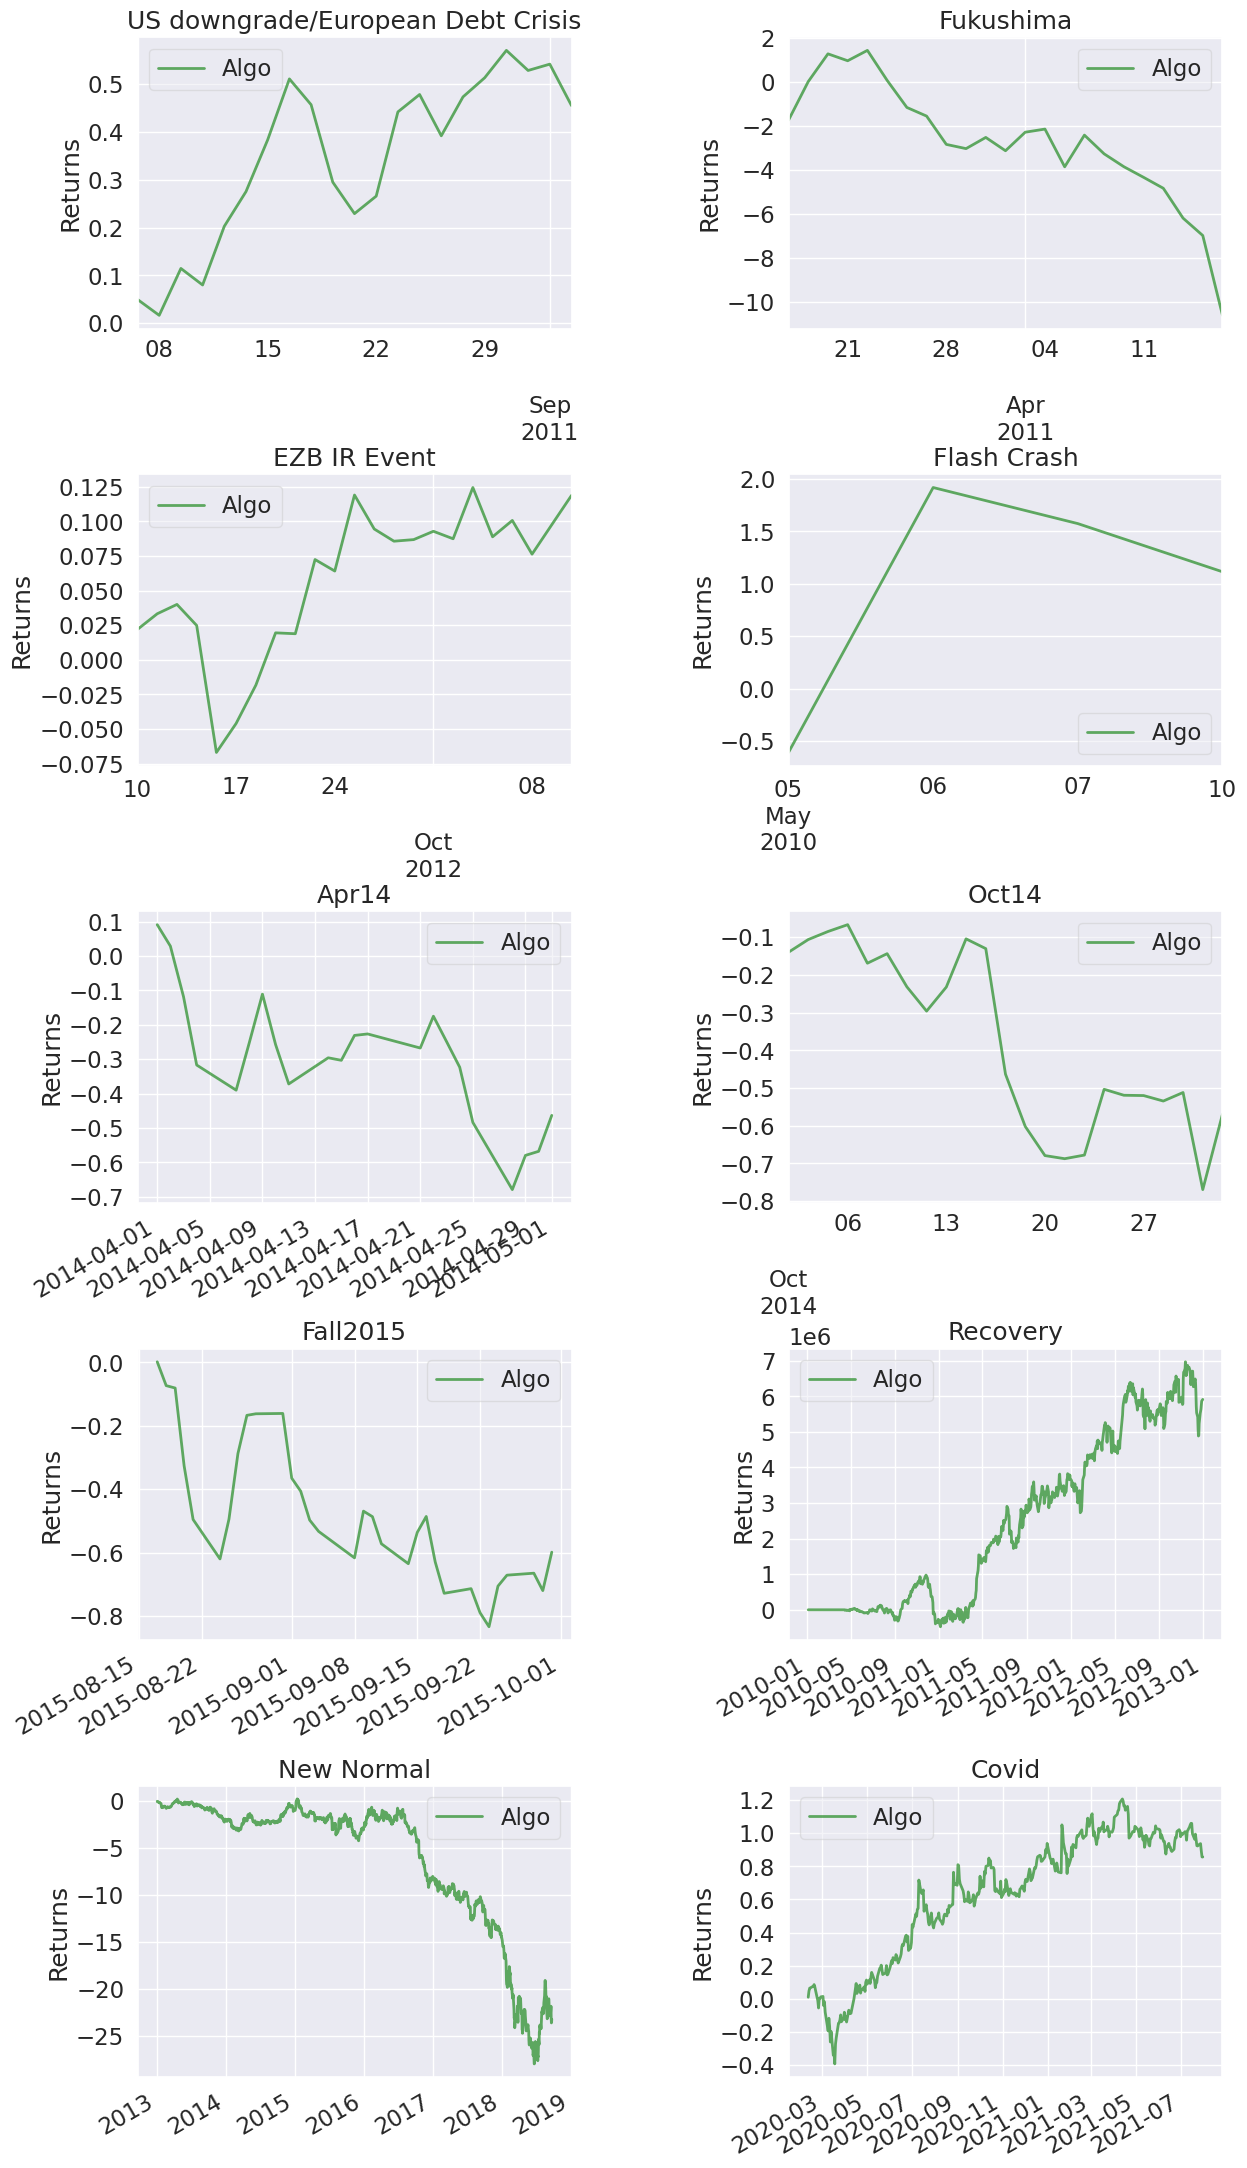

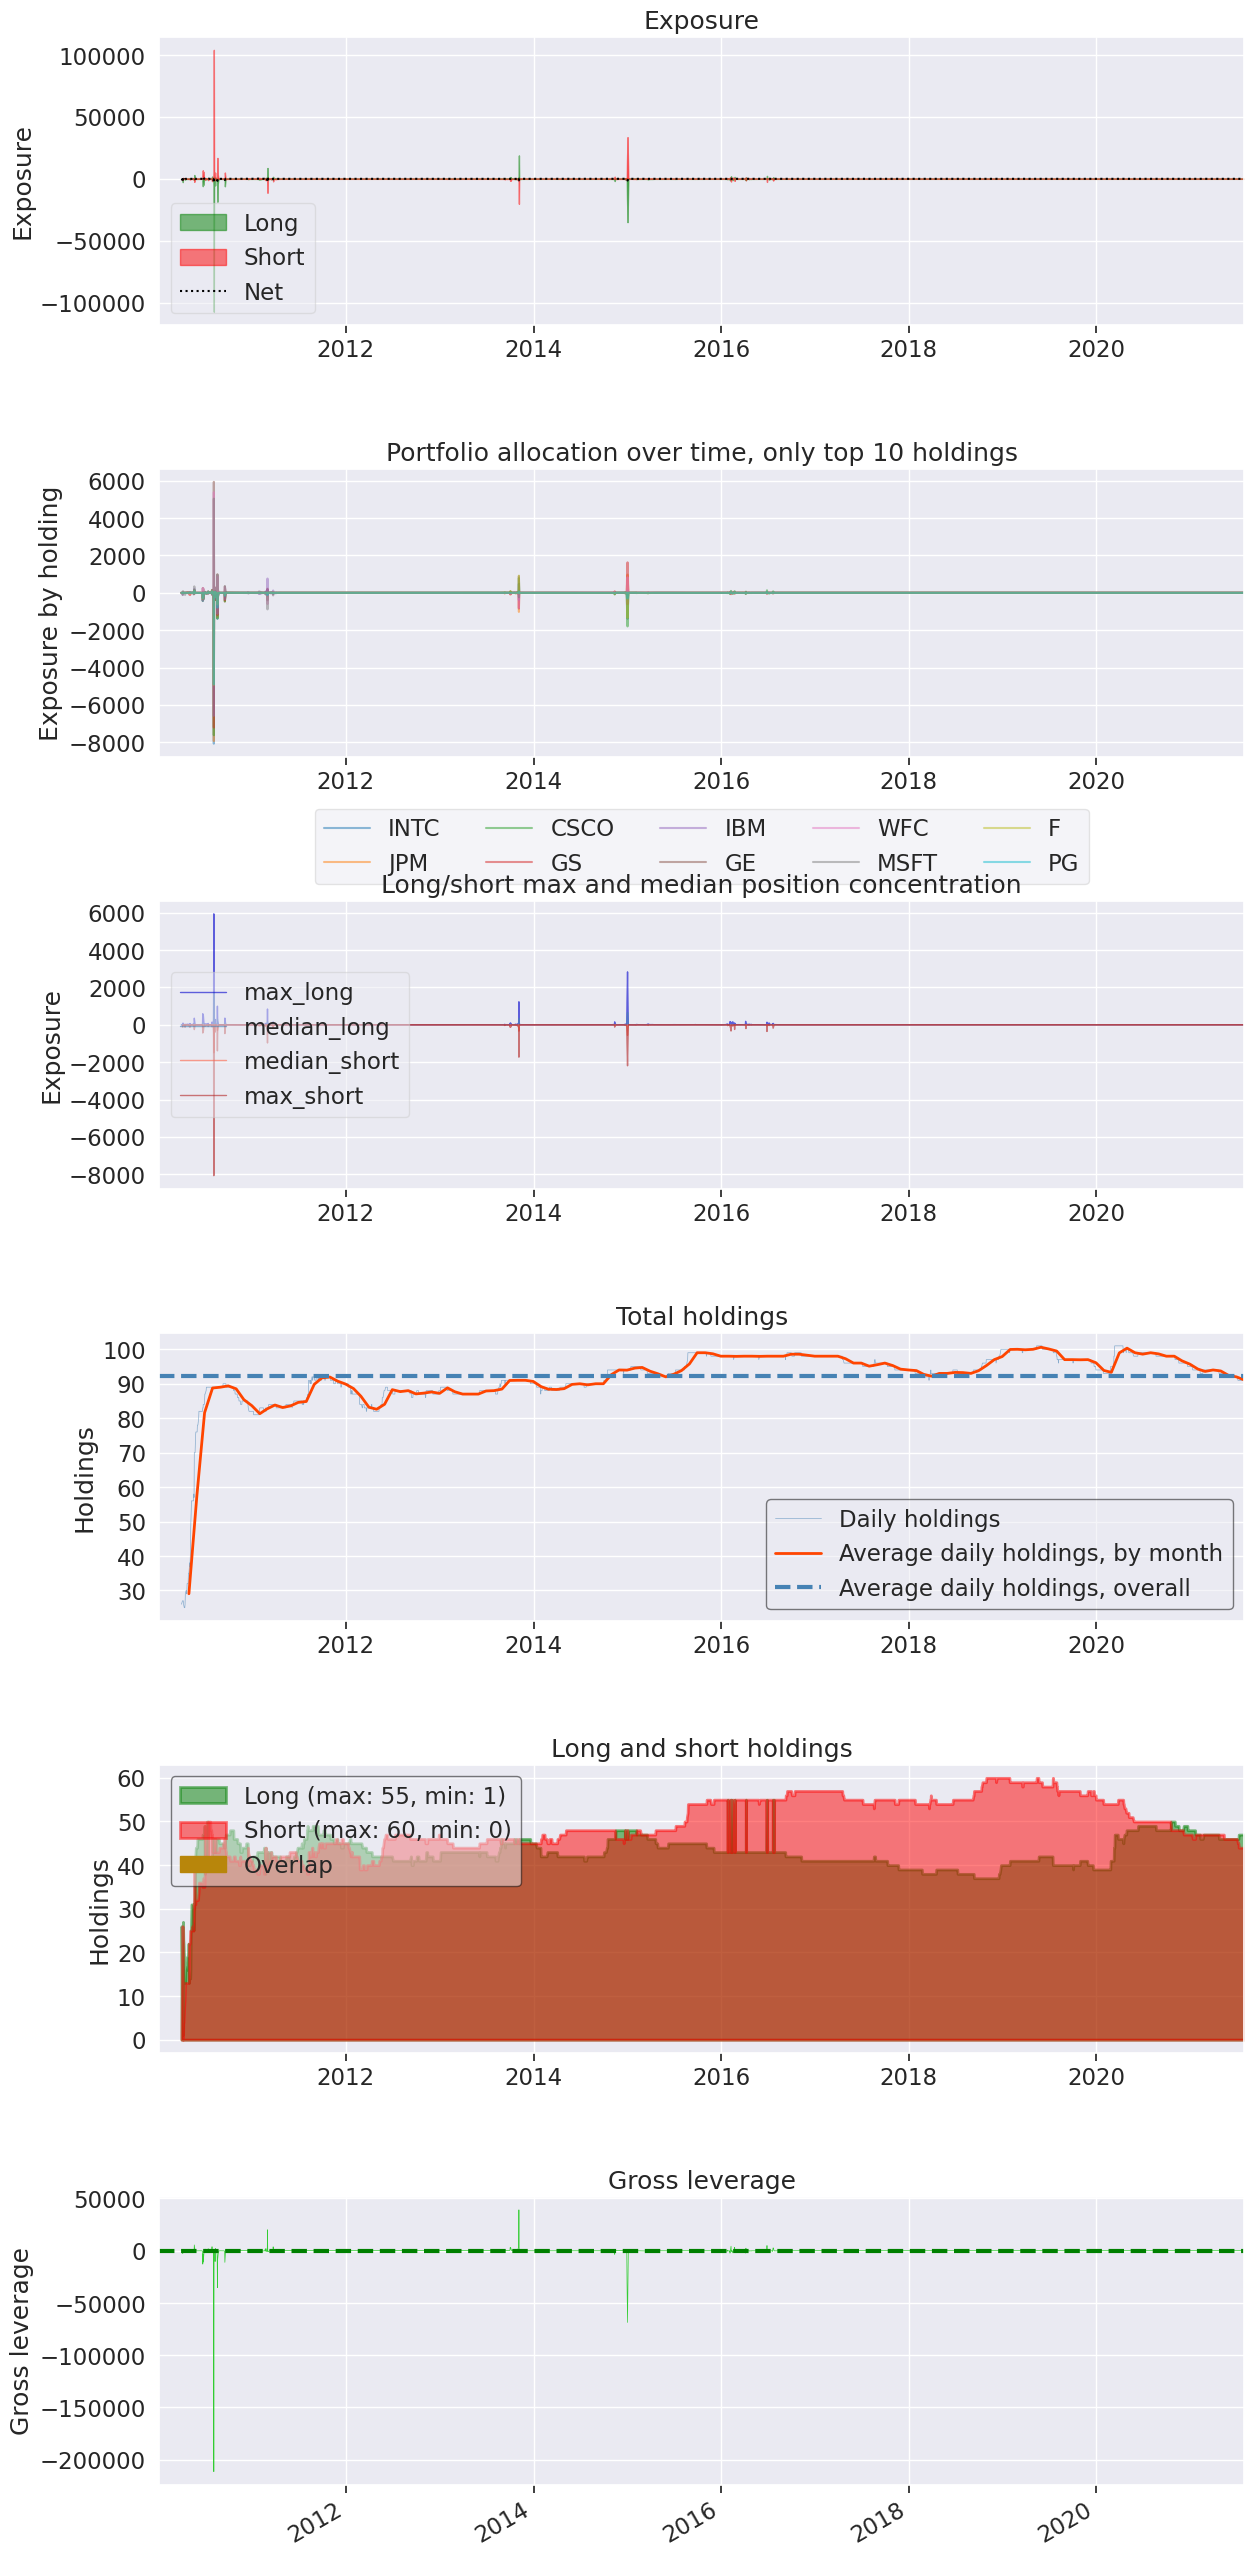

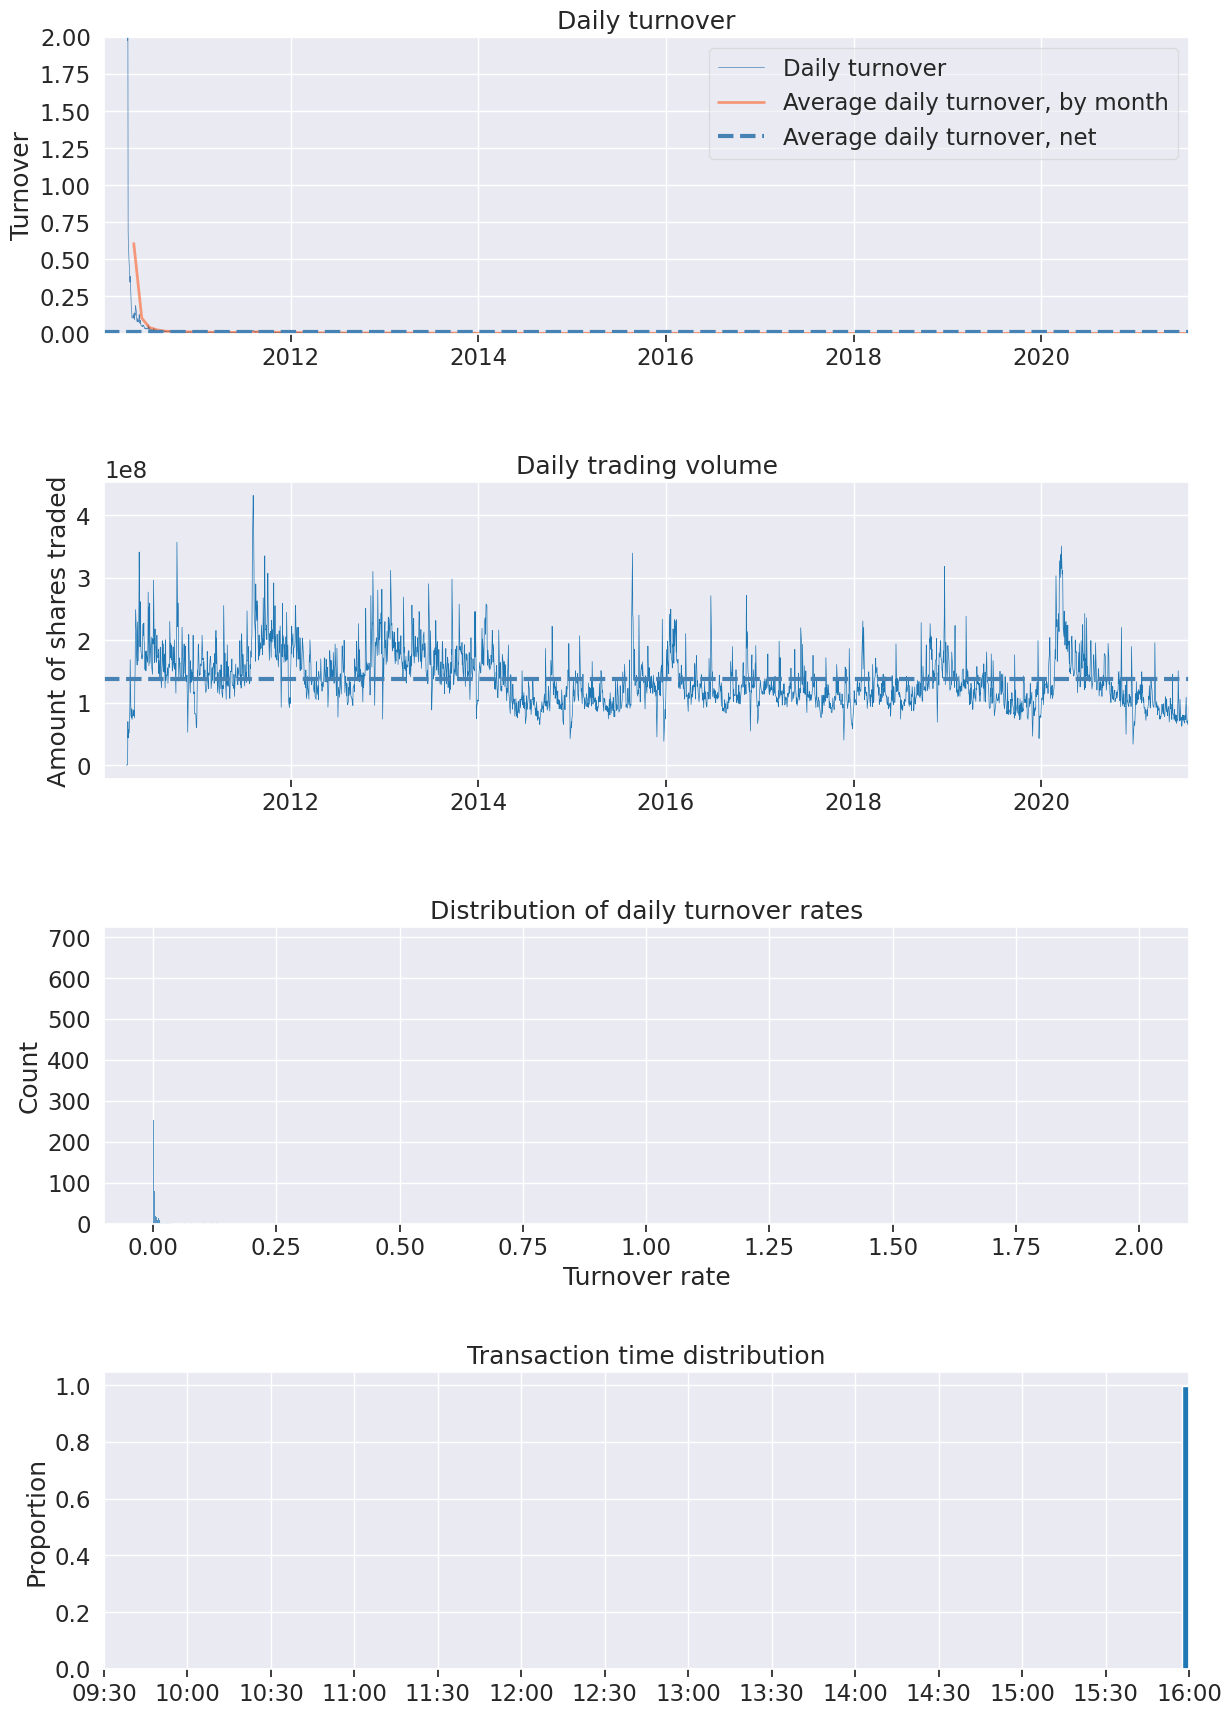

In [23]:
%load_ext autoreload
%autoreload 2

from pyfolio.utils import extract_rets_pos_txn_from_zipline
from pyfolio.tears import create_full_tear_sheet

returns, positions, transactions = extract_rets_pos_txn_from_zipline(result)

create_full_tear_sheet(returns, positions=positions, transactions=transactions)